# HEART ATTACK ANALYSIS & PREDICTION
### I'm using kaggle dataset (https://www.kaggle.com/rashikrahmanpritom/heart-attack-analysis-prediction-dataset) to create models to classify chances of heart attack.

## Parameters description:

age: Age of the patient<br>
sex: Sex of the patient<br>
cp: Chest Pain type chest pain type<br>
    &emsp;&emsp;&emsp;&emsp;Value 1: typical angina<br>
    &emsp;&emsp;&emsp;&emsp;Value 2: atypical angina<br>
    &emsp;&emsp;&emsp;&emsp;Value 3: non-anginal pain<br>
    &emsp;&emsp;&emsp;&emsp;Value 4: asymptomatic<br>
trtbps: resting blood pressure (in mm Hg)<br>
chol: cholestoral in mg/dl fetched via BMI sensor<br>
fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)<br>
restecg: resting electrocardiographic results<br>
    &emsp;&emsp;&emsp;&emsp;Value 0: normal<br>
    &emsp;&emsp;&emsp;&emsp;Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)<br>
    &emsp;&emsp;&emsp;&emsp;Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria<br>
thalachh: maximum heart rate achieved<br>
exng: exercise induced angina (1 = yes; 0 = no)<br>
oldpeak: Previous peak<br>
slp: Slope<br>
caa: number of major vessels (0-3)<br>
thall: Thall rate<br>
output: 0= less chance of heart attack 1= more chance of heart attack<br>

## <br>EDA

In [2]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sns 

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trtbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalachh,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exng,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [10]:
df.nunique()

age          41
sex           2
cp            4
trtbps       49
chol        152
fbs           2
restecg       3
thalachh     91
exng          2
oldpeak      40
slp           3
caa           5
thall         4
output        2
dtype: int64

### Above statistics shows that there are no missing values and that data quality is good.<br>

Text(0.5, 1.0, 'Correlation heatmap')

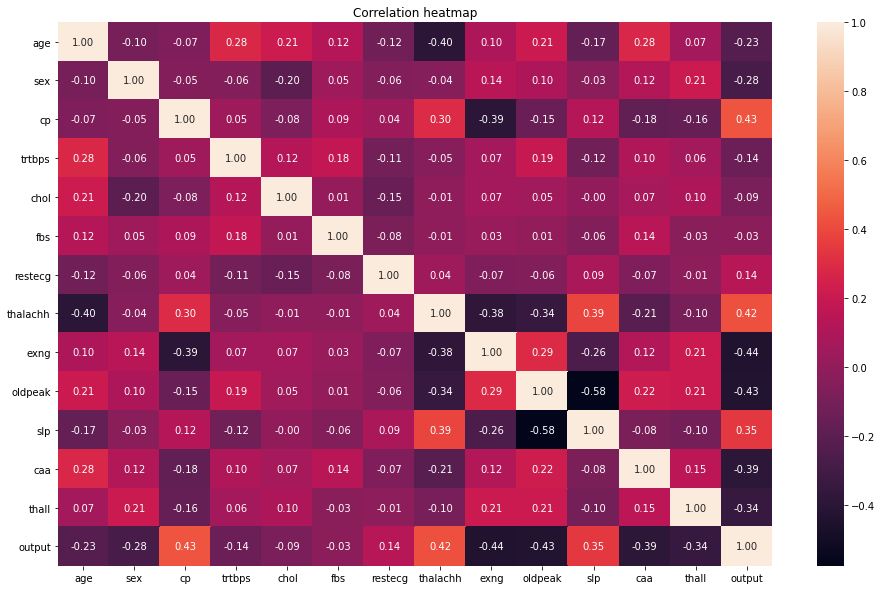

In [12]:
plt.subplots(figsize=(16,10))
sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.title('Correlation heatmap')

### Correlation matrix shows us which features are linearly correlated with output variable.<br>

In [14]:
titles={'age' : 'Age',
        'sex' : 'Gender',
        'cp' : 'Chest pain type',
        'trtbps' : 'Resting blood pressure',
        'chol' : 'Cholesterol [mg/dl]',
        'fbs' : 'Fasting blood sugar',
        'restecg' : 'Resting electrocardiographic results',
        'thalachh' : 'Maximum heart rate',
        'exng' : 'Exercise induced angina',
        'oldpeak' : 'Previous peak',
        'slp' : 'Slope',
        'caa' : 'Number of major vassels',
        'thall' : 'Thal rate',
        'output' : 'Target'}

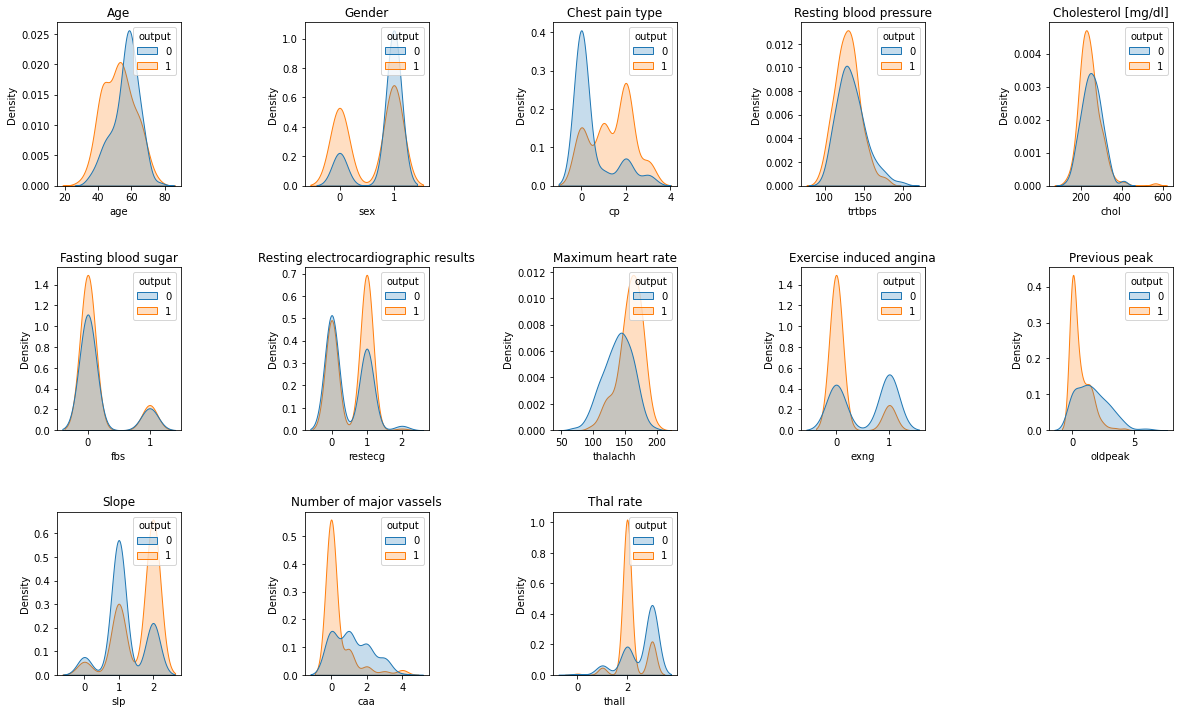

In [15]:
features = df.drop('output', axis=1).columns
fig = plt.figure(figsize=(20,12))
fig.subplots_adjust(hspace=0.5, wspace=1)
for index, feature in enumerate(features):
    fig.add_subplot(3, 5, index+1)
    sns.kdeplot(x=df[feature], hue=df['output'], shade=True)
    plt.title(titles[feature])

### KDE plots are extending information from Correlation Matrix. We can more clearly see the dependencies between different features and both values of output.<br>

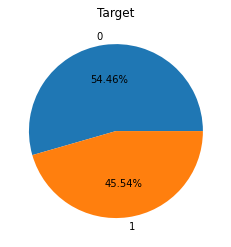

In [9]:
plt.figure(figsize = (4, 4))
plt.pie(df.output.value_counts(), labels=['0', '1'], autopct='%1.2f%%')
plt.title('Target')
plt.show()

### This Pie chart shows the proportions of values of output. Big disproportions are undesirable, because they can have negative impact on classification models.<br>

## Classification models

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [11]:
X = df.drop('output', axis=1)
y = df['output']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Here dataset is divided into input, output and next into training and test sets to be able to test models on unseen data.<br>

In [13]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
scaler.fit(X_test)
X_test_scaled = scaler.transform(X_test)

### Data scaling is done, because data have different measurement scales, so we want to prevent them from influencing our models.<br>

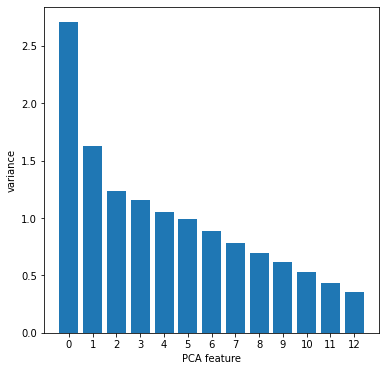

In [14]:
pca = PCA()
pca.fit(X_train_scaled)

features = range(pca.n_components_)
plt.figure(figsize=(6, 6))
plt.bar(features,pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

### Barplot of variances of PCA features shows us the importance of different features. I decided not to reduce any dimension.<br>

## <br>Cross-vaildation

In [15]:
def cross_validation(classifiers):
    scores = []
    for classifier in classifiers:
        scores.append(np.mean(cross_val_score(classifier, X_train_scaled, y_train)))
    print(pd.DataFrame({'score': scores}, index=classifiers).sort_values(by='score', ascending=False))

### Here I have created cross_validation function, which takes list of classifiers as inputs. It performs cross-validation and presents the results in table.<br>

In [16]:
cross_validation([KNeighborsClassifier(), DecisionTreeClassifier(), LogisticRegression(), RandomForestClassifier(), SVC(), GradientBoostingClassifier(), AdaBoostClassifier()])

                                 score
SVC()                         0.822449
LogisticRegression()          0.818027
KNeighborsClassifier()        0.814116
RandomForestClassifier()      0.814116
GradientBoostingClassifier()  0.813861
AdaBoostClassifier()          0.760459
DecisionTreeClassifier()      0.760119


### Here we can notice, that SVC() gave the best result. We can assume that it is the best pick for hyperparameters tuning.<br>

## <br>Hyperparameters tuning

In [17]:
def hyperparameters_tuning_and_visualization(classifier, param_grid):
    model = classifier
    model_cv = GridSearchCV(model, param_grid)
    model_cv.fit(X_train_scaled, y_train)
    print("Best mean accuracy achieved in GridSearchCV: {}".format(model_cv.best_score_))
    y_pred = model_cv.predict(X_test_scaled)
    print("Accuracy achieved on unseen data is {}".format(accuracy_score(y_test, y_pred)))
    print('\n' + classification_report(y_test, y_pred))

    conf_matrix = confusion_matrix(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(2, 2))
    ax.matshow(conf_matrix, cmap=plt.cm.Oranges)
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
           ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size=20)
    
    plt.xlabel('Predictions', size=14)
    plt.ylabel('Actuals', size=14)
    plt.title('Confusion Matrix', size=15)
    plt.show()

### <br>SVC() hyperparameters tuning

Best mean accuracy achieved in GridSearchCV: 0.8224489795918368
Accuracy achieved on unseen data is 0.8688524590163934

              precision    recall  f1-score   support

           0       0.89      0.83      0.86        29
           1       0.85      0.91      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



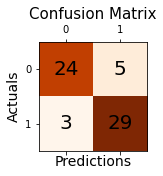

In [18]:
hyperparameters_tuning_and_visualization(classifier=SVC(), param_grid={'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'gamma': ['scale', 'auto']})

### Accuracy achieved on unseen data is ~86.9%, which is really good. However, parameter's tuning didn't improve cross-validation accuracy, so I decided to try to tune parameters of Logistic Regression model (second best).

### <br>LogisticRegression() hyperparameters tuning

Best mean accuracy achieved in GridSearchCV: 0.8180272108843537
Accuracy achieved on unseen data is 0.8852459016393442

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



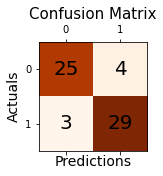

In [19]:
hyperparameters_tuning_and_visualization(classifier=LogisticRegression(), param_grid={'C': [100, 10, 1.0, 0.1, 0.01], 'penalty': ['l1', 'l2']})

### Hyperparameters tuning in Logistic Regression model gave positive results. Accuracy achieved on unseen data is ~88.5%.<br><br>

## FINAL REMARKS
### After tuning hyperparameters in Logistic Regression model, we managed to receive accuracy of ~88.5%. <br><br> The main problem is the size of the dataset is very small, so splitting data has significant impact on performance of particular models. We would need much more data to reach valuable results.